https://www.coursera.org/specializations/spacecraft-dynamics-control




https://nescacademy.nasa.gov/catalogs/gnandc NASA's GN&C Academy

# Star Tracker
Get atlas somewhere - hipparcos, yale bsc (bright start catalog) /  ybs
opencv binarize

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7070887/ Star-Tracker Algorithm for Smartphones and Commercial Micro-Drones

Grid algorithm by padgett and delgado
LIS lost in space problem

pyramid algoriithm mortari

Tetra lost in space algorithm https://digitalcommons.usu.edu/cgi/viewcontent.cgi?article=3655&context=smallsat https://digitalcommons.usu.edu/cgi/viewcontent.cgi?article=3655&context=smallsat
https://github.com/brownj4/Tetra

https://en.m.wikipedia.org/wiki/Geometric_hashing
https://graphics.stanford.edu/courses/cs164-10-spring/Handouts/paper_geohash.pdf geometric hashing an overview
https://researchrepository.wvu.edu/cgi/viewcontent.cgi?article=6704&context=etd A GEOMETRIC HASHING TECHNIQUE FOR STAR PATTERN RECOGNITION - Joshua Gerhard. master's thesis

registration vs tracking

https://en.wikipedia.org/wiki/Star_catalogue
https://pypi.org/project/starcatalogquery/
https://astroalign.quatrope.org/en/latest/
https://astrometry.net/ - image of sky webservice
astrometry?

brute force algorithm. take 3 star triangle. Compute distances. Match against precomputed database

centroid algorithm

vector database?/


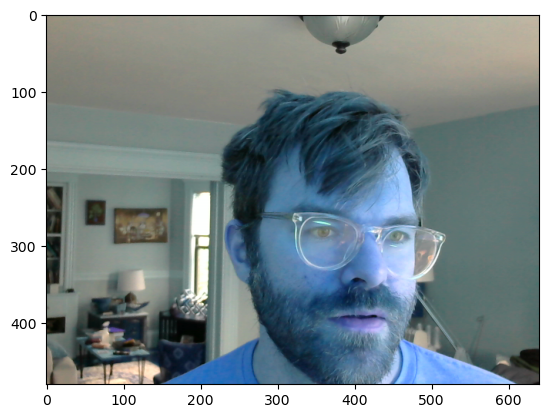

In [33]:
import cv2
from matplotlib import pyplot as plt
#img = cv.imread("path/to/image")
cam = cv2.VideoCapture(4)
if not cam.isOpened():
    raise Exception("Error: Could not open webcam.")
for i in range(3):
    ret, frame = cam.read()
#cv2.imshow('Camera', frame)
frame
from IPython.display import Image

cam.release()
Image(frame)
plt.imshow(frame) 

# Mini Kerbal
https://github.com/moderngl/moderngl



In [12]:
%matplotlib inline

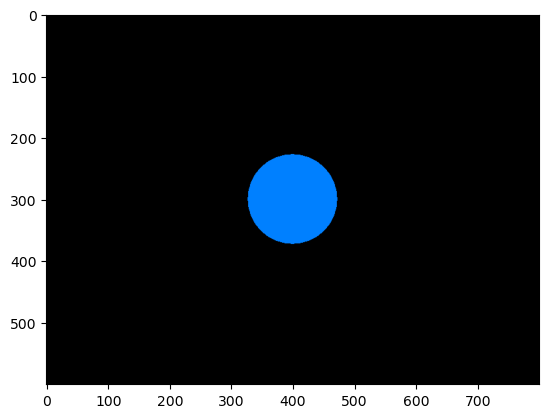

In [21]:
import pygame
from pygame.locals import *
from OpenGL.GL import *
from OpenGL.GLU import *
import math
import numpy as np
import matplotlib.pyplot as plt

SPACECRAFT_DISTANCE = 500
PLANET_RADIUS = 50
WINDOW_WIDTH = 800
WINDOW_HEIGHT = 600
def draw_planet():
    glColor3f(0.0, 0.5, 1.0)
    quadric = gluNewQuadric()
    gluSphere(quadric, PLANET_RADIUS, 32, 32)

def capture_frame() -> np.ndarray:
    glReadBuffer(GL_FRONT)
    pixels = glReadPixels(0, 0, WINDOW_WIDTH, WINDOW_HEIGHT, GL_RGB, GL_UNSIGNED_BYTE)
    image = np.frombuffer(pixels, dtype=np.uint8).reshape(WINDOW_HEIGHT, WINDOW_WIDTH, 3)
    #image = cv2.flip(image, 0)  # Flip vertically
    return image


def main():
    try:
        pygame.init()
        display =  (WINDOW_WIDTH, WINDOW_HEIGHT)
        pygame.display.set_mode(display, DOUBLEBUF | OPENGL)
        gluPerspective(45, (display[0] / display[1]), 0.1, 1000.0)
        glTranslatef(0.0, 0.0, -SPACECRAFT_DISTANCE)  # Set the initial distance from the planet

        while True:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    image = capture_frame()
                    pygame.quit()
                    return  image

            glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT)

            draw_planet()

            pygame.display.flip()
            pygame.time.wait(10)  # Small delay to limit the frame rate
    except Exception as e:
        pygame.quit()
        raise e
image = main()
plt.imshow(image)

# Old

Kalman filters
h infinity
non linear control

particle filters
statistical estimation and control
AIAA
rendezvous

orbital manuevers
hohmann transfer.
bi-elliptic transfer 


https://github.com/nasa/COTS-Star-Tracker
https://github.com/UWCubeSat/lost
https://github.com/openlunar/lincov
Symbolic Linear Covariance Analysis Tool (SLiC) https://www.osti.gov/servlets/purl/1908783
https://www.orekit.org/

GMAT https://opensource.gsfc.nasa.gov/projects/GMAT/index.php https://www.youtube.com/watch?v=jvF7rSYQ8WI
STK


casadi
acado
gekko
https://web.casadi.org/
https://www.philipzucker.com/casadi-pretty-damn-slick/
https://hackage.haskell.org/package/dynobud

Univ solorado ciourse

Can I do the LQR manipulations.
Brute simpliciations
Under assumptions.
Backtracking


https://www.quantamagazine.org/geometers-engineer-new-tools-to-wrangle-spacecraft-orbits-20240415/
symplectic geometry


In [ ]:
A = ("A",)
Q = ("Q",)
K = ("K",)
J = ("J",)
T = ("T",)
def prod(a,b):
    return ("*", a, b)
@dataclass
class Term:
    head: str
    args: tuple[Any,...]
    def __mul__(self,other):
        return Term("*", (self, other))
    def __add__(self,other):
        return Term("+", (self, other))
    
def simplify1(t):
    match t:
        case Term("*", (Term("*", (a,b)), c)):
            return simplify1(a*b*c)
